In [2]:
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', None)
import requests
import json
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#pickle
import pickle

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

In [3]:
df = pd.read_csv("../Resources/df_sub_other_final.csv", low_memory=False)
df.head()

,watch,hour,latitude,status,status_target,division_Central,division_NorthCentral,division_NorthEast,division_NorthWest,division_SouthCentral,division_SouthEast,division_SouthWest,district_D1,district_D10,district_D11,district_D12,district_D13,district_D14,district_D2,district_D3,district_D4,district_D5,district_D6,district_D7,district_D8,district_D9,day1_Fri,day1_Mon,day1_Sat,day1_Sun,day1_Thu,day1_Tue,day1_Wed,nibrs_crime_category_ALL OTHER OFFENSES,nibrs_crime_category_ASSAULT OFFENSES,nibrs_crime_category_BURGLARY/ BREAKING & ENTERING,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,nibrs_crime_category_LARCENY/ THEFT OFFENSES,nibrs_crime_category_MISCELLANEOUS,nibrs_crime_category_MOTOR VEHICLE THEFT,nibrs_crime_category_PUBLIC INTOXICATION,nibrs_crime_category_ROBBERY,nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS
0,3,17,32.716980,Clear by Arrest,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,2,5,32.936496,Closed/Cleared,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,15,32.731606,Suspended,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,3,32.801089,Closed/Cleared,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,3,16,32.734110,Clear by Arrest,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# Model 1

In [4]:
df["is_suspended"] = [1 if x == 2 else 0 for x in df.status_target]
df.head()

,watch,hour,latitude,status,status_target,division_Central,division_NorthCentral,division_NorthEast,division_NorthWest,division_SouthCentral,division_SouthEast,division_SouthWest,district_D1,district_D10,district_D11,district_D12,district_D13,district_D14,district_D2,district_D3,district_D4,district_D5,district_D6,district_D7,district_D8,district_D9,day1_Fri,day1_Mon,day1_Sat,day1_Sun,day1_Thu,day1_Tue,day1_Wed,nibrs_crime_category_ALL OTHER OFFENSES,nibrs_crime_category_ASSAULT OFFENSES,nibrs_crime_category_BURGLARY/ BREAKING & ENTERING,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,nibrs_crime_category_LARCENY/ THEFT OFFENSES,nibrs_crime_category_MISCELLANEOUS,nibrs_crime_category_MOTOR VEHICLE THEFT,nibrs_crime_category_PUBLIC INTOXICATION,nibrs_crime_category_ROBBERY,nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS,is_suspended
0,3,17,32.716980,Clear by Arrest,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,2,5,32.936496,Closed/Cleared,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,15,32.731606,Suspended,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,3,32.801089,Closed/Cleared,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,3,16,32.734110,Clear by Arrest,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [5]:
# get pandas columns for prediction
target = df["is_suspended"]
features = df.drop(["is_suspended", "status", "status_target"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=target)

In [26]:
len(features.columns)

42

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17380
           1       1.00      1.00      1.00     77042

    accuracy                           1.00     94422
   macro avg       1.00      0.99      0.99     94422
weighted avg       1.00      1.00      1.00     94422


Confusion Matrix - In Sample
[[17136   244]
 [   80 76962]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.62      0.51      0.56      4345
           1       0.89      0.93      0.91     19261

    accuracy                           0.85     23606
   macro avg       0.76      0.72      0.73     23606
weighted avg       0.84      0.85      0.85     23606


Confusion Matrix - Out Sample
[[ 2195  2150]
 [ 1334 17927]]


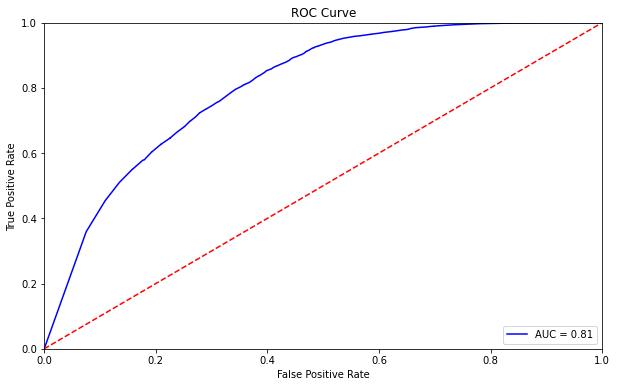

In [5]:
# train the model
rf = RandomForestClassifier(random_state=27, n_estimators=100)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Ada Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.84      0.31      0.46     17380
           1       0.86      0.99      0.92     77042

    accuracy                           0.86     94422
   macro avg       0.85      0.65      0.69     94422
weighted avg       0.86      0.86      0.84     94422


Confusion Matrix - In Sample
[[ 5442 11938]
 [ 1046 75996]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.82      0.31      0.45      4345
           1       0.86      0.99      0.92     19261

    accuracy                           0.86     23606
   macro avg       0.84      0.65      0.69     23606
weighted avg       0.86      0.86      0.83     23606


Confusion Matrix - Out Sample
[[ 1346  2999]
 [  287 18974]]


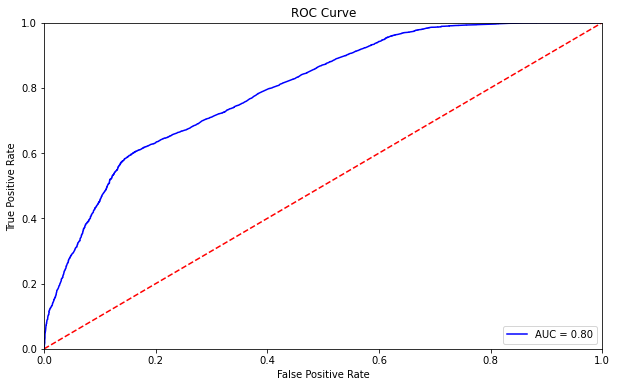

In [35]:
# train the model
ada = AdaBoostClassifier(random_state=27)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("Ada Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = ada.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.85      0.33      0.47     17380
           1       0.87      0.99      0.92     77042

    accuracy                           0.87     94422
   macro avg       0.86      0.66      0.70     94422
weighted avg       0.86      0.87      0.84     94422


Confusion Matrix - In Sample
[[ 5713 11667]
 [  999 76043]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.84      0.32      0.46      4345
           1       0.87      0.99      0.92     19261

    accuracy                           0.86     23606
   macro avg       0.85      0.65      0.69     23606
weighted avg       0.86      0.86      0.84     23606


Confusion Matrix - Out Sample
[[ 1391  2954]
 [  271 18990]]


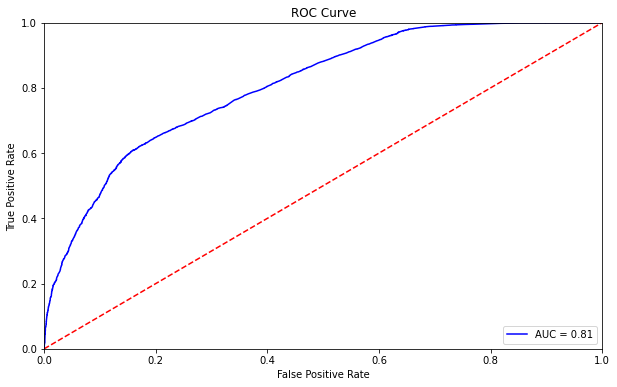

In [37]:
# train the model
gb = GradientBoostingClassifier(random_state=27)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/alexarnold/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:30:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.86      0.37      0.52     17380
           1       0.87      0.99      0.93     77042

    accuracy                           0.87     94422
   macro avg       0.87      0.68      0.72     94422
weighted avg       0.87      0.87      0.85     94422


Confusion Matrix - In Sample
[[ 6452 10928]
 [ 1032 76010]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.81      0.34      0.48      4345
           1       0.87      0.98      0.92     19261

    accuracy                           0.86     23606
   macro avg       0

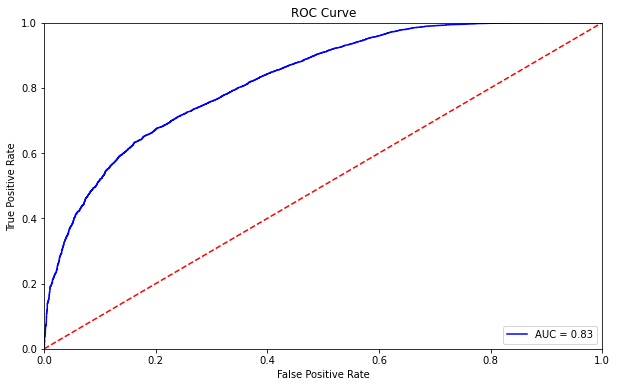

In [6]:
# train the model
xgb = XGBClassifier(random_state=27)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
feature_importance = pd.DataFrame(list(zip(features.columns, xgb.feature_importances_))).sort_values(by=1, ascending=False)
feature_importance = feature_importance.rename(columns={"0": "Feature", "1": "Importance"})
feature_importance

,0,1
39,nibrs_crime_category_PUBLIC INTOXICATION,0.455910
35,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,0.216200
31,nibrs_crime_category_ALL OTHER OFFENSES,0.054971
33,nibrs_crime_category_BURGLARY/ BREAKING & ENTE...,0.044807
36,nibrs_crime_category_LARCENY/ THEFT OFFENSES,0.042381
32,nibrs_crime_category_ASSAULT OFFENSES,0.026092
37,nibrs_crime_category_MISCELLANEOUS,0.024852
38,nibrs_crime_category_MOTOR VEHICLE THEFT,0.011325
34,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VAND...,0.011018
41,nibrs_crime_category_TRAFFIC VIOLATION - HAZAR...,0.010455


In [8]:
feature_importance.to_csv("../Resources/feature_importances.csv", index=False)

# Model 2

In [9]:
df2 = df.loc[df.is_suspended == 0].reset_index(drop=True)
df2.head()

,watch,hour,latitude,status,status_target,division_Central,division_NorthCentral,division_NorthEast,division_NorthWest,division_SouthCentral,division_SouthEast,division_SouthWest,district_D1,district_D10,district_D11,district_D12,district_D13,district_D14,district_D2,district_D3,district_D4,district_D5,district_D6,district_D7,district_D8,district_D9,day1_Fri,day1_Mon,day1_Sat,day1_Sun,day1_Thu,day1_Tue,day1_Wed,nibrs_crime_category_ALL OTHER OFFENSES,nibrs_crime_category_ASSAULT OFFENSES,nibrs_crime_category_BURGLARY/ BREAKING & ENTERING,nibrs_crime_category_DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,nibrs_crime_category_DRUG/ NARCOTIC VIOLATIONS,nibrs_crime_category_LARCENY/ THEFT OFFENSES,nibrs_crime_category_MISCELLANEOUS,nibrs_crime_category_MOTOR VEHICLE THEFT,nibrs_crime_category_PUBLIC INTOXICATION,nibrs_crime_category_ROBBERY,nibrs_crime_category_TRAFFIC VIOLATION - HAZARDOUS,is_suspended
0,3,17,32.716980,Clear by Arrest,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,2,5,32.936496,Closed/Cleared,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,3,32.801089,Closed/Cleared,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,3,16,32.734110,Clear by Arrest,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,3,21,32.924254,Clear by Arrest,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
# get pandas columns for prediction
target2 = df2["status_target"]
features2 = df2.drop(["is_suspended", "status", "status_target"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X2 = np.array(features2)
y2 = np.array(target2)

# train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=27, stratify=target2)

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14237
           1       1.00      1.00      1.00      3143

    accuracy                           1.00     17380
   macro avg       1.00      1.00      1.00     17380
weighted avg       1.00      1.00      1.00     17380


Confusion Matrix - In Sample
[[14230     7]
 [    9  3134]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3559
           1       0.60      0.60      0.60       786

    accuracy                           0.86      4345
   macro avg       0.76      0.76      0.76      4345
weighted avg       0.86      0.86      0.86      4345


Confusion Matrix - Out Sample
[[3244  315]
 [ 315  471]]


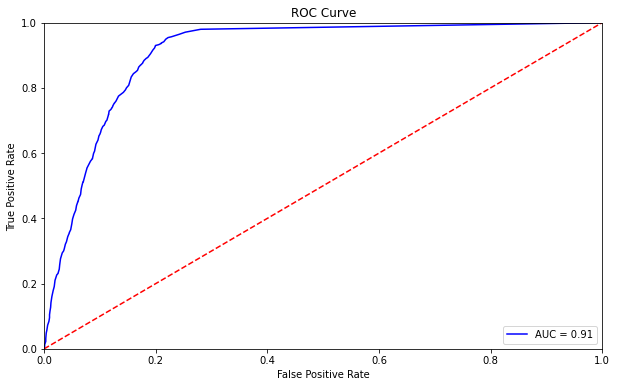

In [13]:
# train the model
rf2 = RandomForestClassifier(random_state=27, n_estimators=100)
rf2.fit(X_train2, y_train2)

#get predictions
in_sample_preds2 = rf2.predict(X_train2)
out_sample_preds2 = rf2.predict(X_test2)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train2, in_sample_preds2))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train2, in_sample_preds2))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test2, out_sample_preds2))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test2, out_sample_preds2))

# get probabilities for the ROC curve
preds2 = rf2.predict_proba(X_test2)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test2, preds2)
roc_auc2 = auc(fpr2, tpr2)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Ada Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     14237
           1       0.59      0.58      0.59      3143

    accuracy                           0.85     17380
   macro avg       0.75      0.74      0.75     17380
weighted avg       0.85      0.85      0.85     17380


Confusion Matrix - In Sample
[[12999  1238]
 [ 1330  1813]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3559
           1       0.56      0.57      0.56       786

    accuracy                           0.84      4345
   macro avg       0.73      0.74      0.73      4345
weighted avg       0.84      0.84      0.84      4345


Confusion Matrix - Out Sample
[[3200  359]
 [ 336  450]]


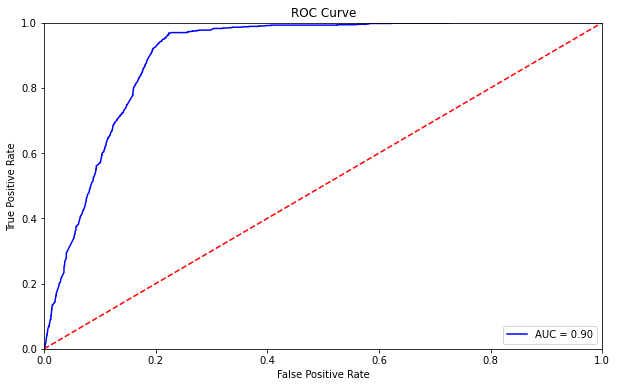

In [36]:
# train the model
ada2 = AdaBoostClassifier(random_state=27)
ada2.fit(X_train2, y_train2)

#get predictions
in_sample_preds2 = ada2.predict(X_train2)
out_sample_preds2 = ada2.predict(X_test2)

# get evaluation report
print("Ada Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train2, in_sample_preds2))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train2, in_sample_preds2))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test2, out_sample_preds2))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test2, out_sample_preds2))

# get probabilities for the ROC curve
preds2 = ada2.predict_proba(X_test2)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test2, preds2)
roc_auc2 = auc(fpr2, tpr2)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     14237
           1       0.70      0.59      0.64      3143

    accuracy                           0.88     17380
   macro avg       0.80      0.76      0.78     17380
weighted avg       0.87      0.88      0.87     17380


Confusion Matrix - In Sample
[[13428   809]
 [ 1299  1844]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3559
           1       0.64      0.57      0.60       786

    accuracy                           0.87      4345
   macro avg       0.78      0.75      0.76      4345
weighted avg       0.86      0.87      0.86      4345


Confusion Matrix - Out Sample
[[3313  246]
 [ 340  446]]


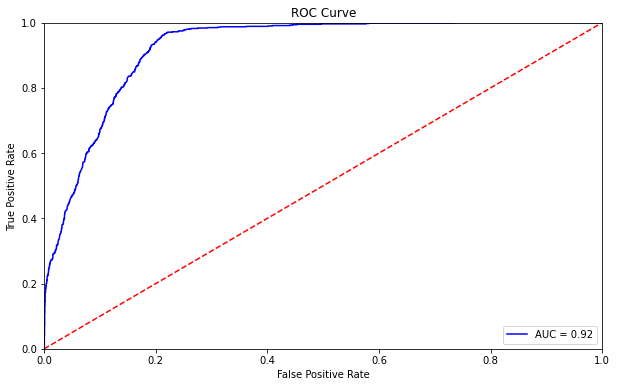

In [38]:
# train the model
gb2 = GradientBoostingClassifier(random_state=27)
gb2.fit(X_train2, y_train2)

#get predictions
in_sample_preds2 = gb2.predict(X_train2)
out_sample_preds2 = gb2.predict(X_test2)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train2, in_sample_preds2))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train2, in_sample_preds2))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test2, out_sample_preds2))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test2, out_sample_preds2))

# get probabilities for the ROC curve
preds2 = gb2.predict_proba(X_test2)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test2, preds2)
roc_auc2 = auc(fpr2, tpr2)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/alexarnold/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:31:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14237
           1       0.87      0.77      0.82      3143

    accuracy                           0.94     17380
   macro avg       0.91      0.87      0.89     17380
weighted avg       0.94      0.94      0.94     17380


Confusion Matrix - In Sample
[[13879   358]
 [  713  2430]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3559
           1       0.64      0.58      0.61       786

    accuracy                           0.87      4345
   macro avg       0

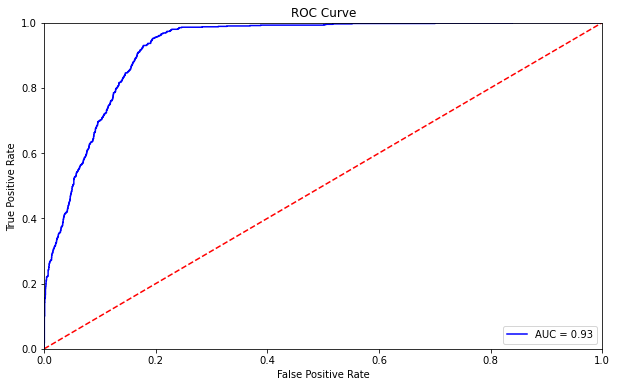

In [11]:
# train the model
xgb2 = XGBClassifier(random_state=27)
xgb2.fit(X_train2, y_train2)

#get predictions
in_sample_preds2 = xgb2.predict(X_train2)
out_sample_preds2 = xgb2.predict(X_test2)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train2, in_sample_preds2))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train2, in_sample_preds2))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test2, out_sample_preds2))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test2, out_sample_preds2))

# get probabilities for the ROC curve
preds2 = xgb2.predict_proba(X_test2)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test2, preds2)
roc_auc2 = auc(fpr2, tpr2)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
feature_importance2 = pd.DataFrame(list(zip(features2.columns, xgb2.feature_importances_))).sort_values(by=1, ascending=False)
feature_importance2 = feature_importance2.rename(columns={"0": "Feature", "1": "Importance"})
feature_importance2

,0,1
37,nibrs_crime_category_MISCELLANEOUS,0.789300
4,division_NorthCentral,0.017487
0,watch,0.017176
20,district_D6,0.010601
1,hour,0.008913
21,district_D7,0.007895
39,nibrs_crime_category_PUBLIC INTOXICATION,0.007643
22,district_D8,0.007201
3,division_Central,0.007191
8,division_SouthEast,0.006363


In [14]:
feature_importance2.to_csv("../Resources/feature_importances2.csv", index=False)

# Model Selection

In [10]:
# We chose XGB for Model 1 as it does not overfit the data as it does well at predicting with the highest AUC at 0.83
# highest accuracy and highest F-1 scores

In [11]:
# We also chose XGB for Model 2 as it does not overfit like Random Forest. It also has the highest AUC at 0.93
# highest accuracy and F-1 scores

### Model 1

/Users/alexarnold/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:58:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.86      0.35      0.50     21725
           1       0.87      0.99      0.93     96303

    accuracy                           0.87    118028
   macro avg       0.86      0.67      0.71    118028
weighted avg       0.87      0.87      0.85    118028


Confusion Matrix - In Sample
[[ 7674 14051]
 [ 1262 95041]]




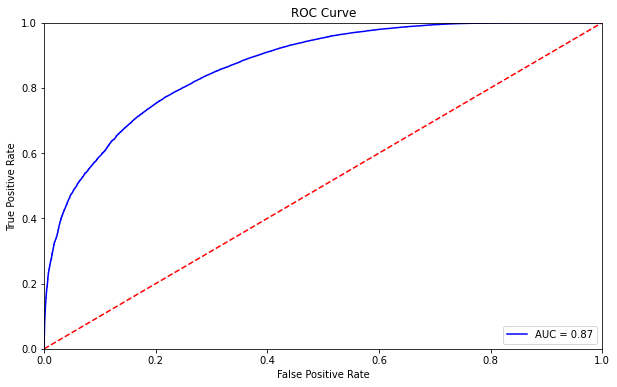

In [31]:
# train the model
xgb = XGBClassifier(random_state=27)
xgb.fit(X, y)

#get predictions
in_sample_preds = xgb.predict(X)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y, in_sample_preds))
print()
print()

# get probabilities for the ROC curve
preds = xgb.predict_proba(X)[:,1]
fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model 2

/Users/alexarnold/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17796
           1       0.85      0.75      0.80      3929

    accuracy                           0.93     21725
   macro avg       0.90      0.86      0.88     21725
weighted avg       0.93      0.93      0.93     21725


Confusion Matrix - In Sample
[[17269   527]
 [  986  2943]]




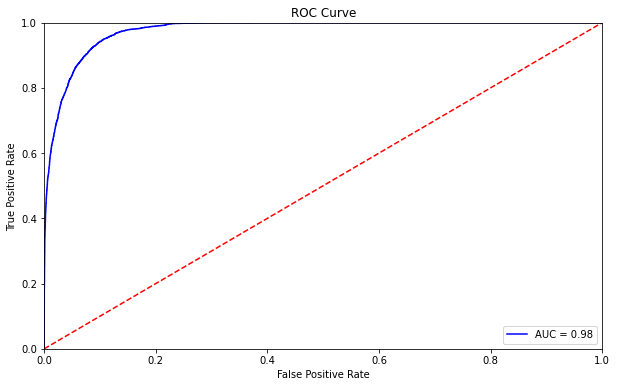

In [13]:
# train the model
xgb2 = XGBClassifier(random_state=27)
xgb2.fit(X2, y2)

#get predictions
in_sample_preds2 = xgb2.predict(X2)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y2, in_sample_preds2))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y2, in_sample_preds2))
print()
print()

# get probabilities for the ROC curve
preds2 = xgb2.predict_proba(X2)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y2, preds2)
roc_auc2 = auc(fpr2, tpr2)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Save Models

### Model 1

In [32]:
filename = "finalized_crime_model1.sav"
pickle.dump(xgb, open(filename, 'wb'))

In [33]:
len(X[0])

42

In [34]:
len(X2[0])

42

### Model 2

In [35]:
filename = "finalized_crime_model2.sav"
pickle.dump(xgb2, open(filename, 'wb'))

# FOR AFTER

In [34]:
new_pred = rf.predict_proba([X_test[0]])
new_pred

array([[0.07, 0.93]])

In [15]:
#93% chance

In [21]:
new_pred2 = rf2.predict_proba([X_test[0]])
new_pred2

array([[0.59, 0.41]])

In [17]:
# assuming not suspended, 59% arrest, 41% closed

In [ ]:
## Probabilities

In [32]:
pred_mult = new_pred[0][0]*new_pred2[0]
pred_mult = np.append(pred_mult, [new_pred[0][1]])
pred_mult

array([0.0413, 0.0287, 0.93  ])

In [33]:
np.argmax(pred_mult)

2